<a href="https://colab.research.google.com/github/DavidGJ2002/ArtificialVision/blob/main/Clasificador/3_1VAF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist

class MinimumDistanceClassifier:
    def __init__(self):
        self.centroids = None

    def fit(self, X, y):
        classes = np.unique(y)
        self.centroids = np.array([X[y == cls].mean(axis=0) for cls in classes])

    def predict(self, X):
        distances = cdist(X, self.centroids, 'euclidean')
        return np.argmin(distances, axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def pca_manual(X, num_components):
    X_centered = X - np.mean(X, axis=0)
    covariance_matrix = np.cov(X_centered, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    idx = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, idx]
    return np.dot(X_centered, eigenvectors[:, :num_components])

In [ ]:
from sklearn.manifold import TSNE

def apply_tsne(X, n_components=2):
    tsne = TSNE(n_components=n_components, random_state=42)
    return tsne.fit_transform(X)

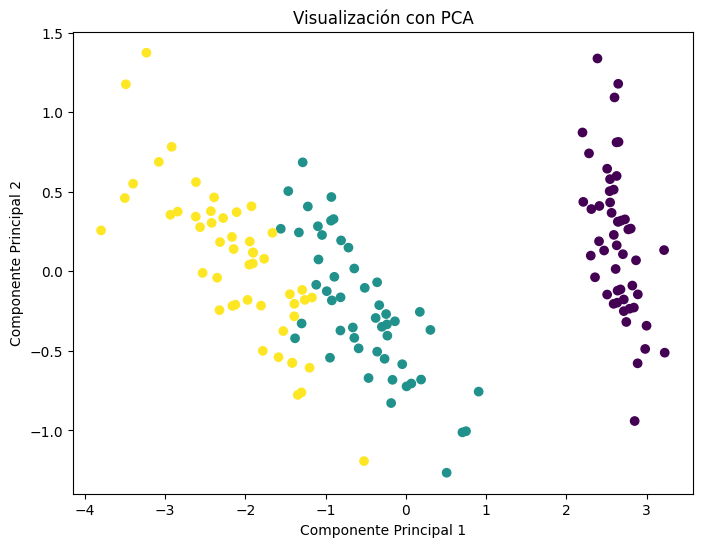

In [ ]:
import matplotlib.pyplot as plt

X_pca = pca_manual(X, 2)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización con PCA')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

clf = MinimumDistanceClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


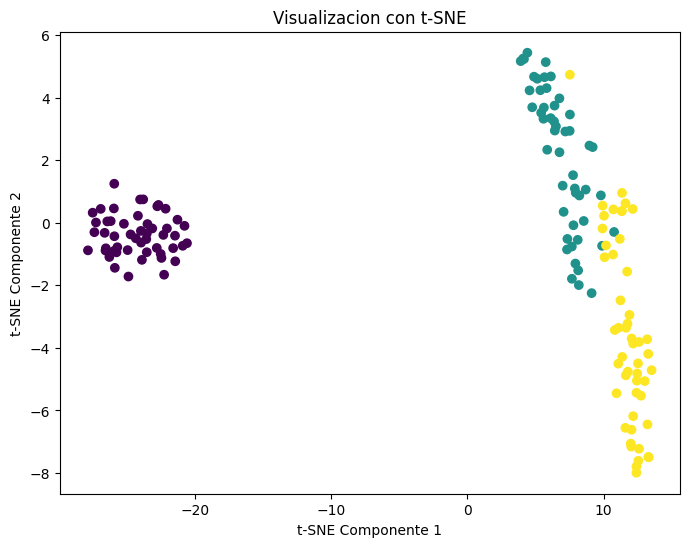

In [ ]:
X_tsne_2_classes = apply_tsne(X, 2)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne_2_classes[:, 0], X_tsne_2_classes[:, 1], c=y)
plt.xlabel('t-SNE Componente 1')
plt.ylabel('t-SNE Componente 2')
plt.title('Visualizacion con t-SNE')
plt.show()


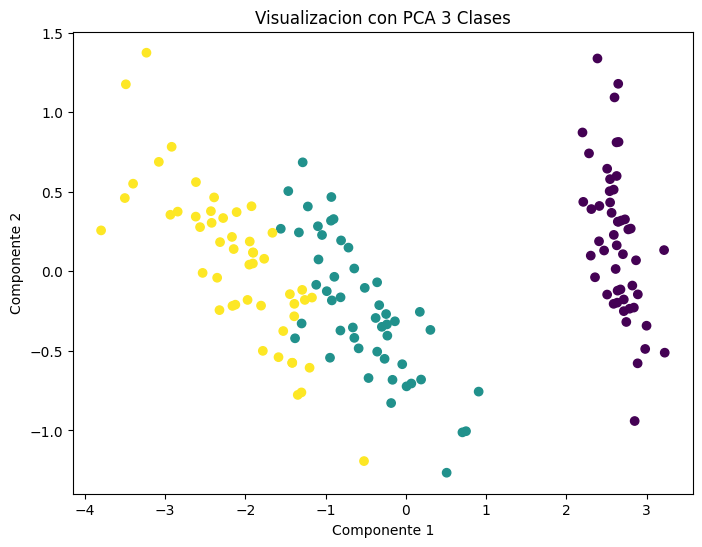

In [ ]:
X_pca_3_classes = pca_manual(X, 2)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_3_classes[:, 0], X_pca_3_classes[:, 1], c=y)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Visualizacion con PCA 3 Clases')
plt.show()


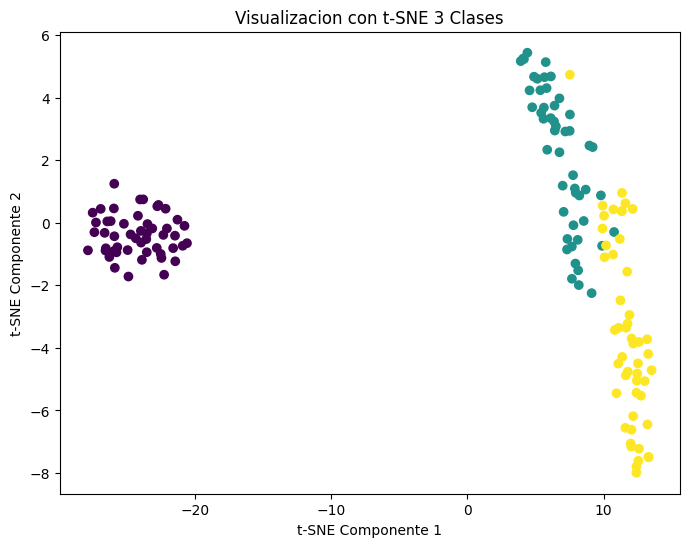

In [ ]:
X_tsne_3_classes = apply_tsne(X, 2)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne_3_classes[:, 0], X_tsne_3_classes[:, 1], c=y)
plt.xlabel('t-SNE Componente 1')
plt.ylabel('t-SNE Componente 2')
plt.title('Visualizacion con t-SNE 3 Clases')
plt.show()



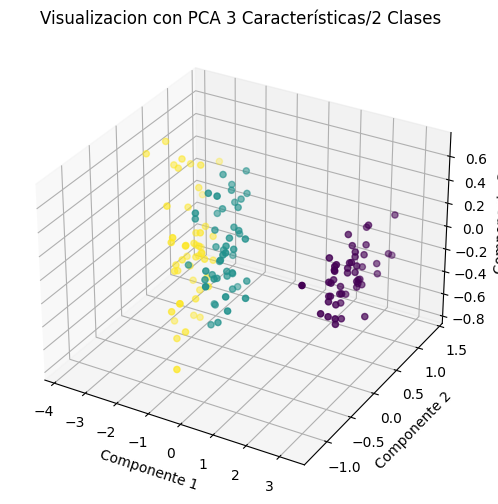

In [ ]:
X_pca_3_features = pca_manual(X, 3)


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3_features[:, 0], X_pca_3_features[:, 1], X_pca_3_features[:, 2], c=y)
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')
ax.set_title('Visualizacion con PCA 3 Características/2 Clases')
plt.show()